**Author:** *Johannes Peter Knoll*

# Introduction

This Notebook is supposed to demonstrate the results of all calculations that are made in
the main.py file

In [15]:
# The autoreload extension allows you to tweak the code in the imported modules
# and rerun cells to reflect the changes.
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parameters and Files

In [16]:
import main

import random
import numpy as np

In [17]:
PREPARATION_DIRECTORY = main.PREPARATION_DIRECTORY
PREPARATION_RESULTS_NAME = main.PREPARATION_RESULTS_NAME

In [28]:
parameters = main.parameters

# Preparation

## Calculating Valid ECG Regions:

Go ahead and change the file_name and xlim to see different data in different intervals!  
Plotting Time: up to 35s (it's a lot of data)

ATTENTION: Valid ECG Regions must have been compiled first (see main.py - PREPARATION SECTION)  

(Valid / Total) Regions Ratio: 41.820000 %


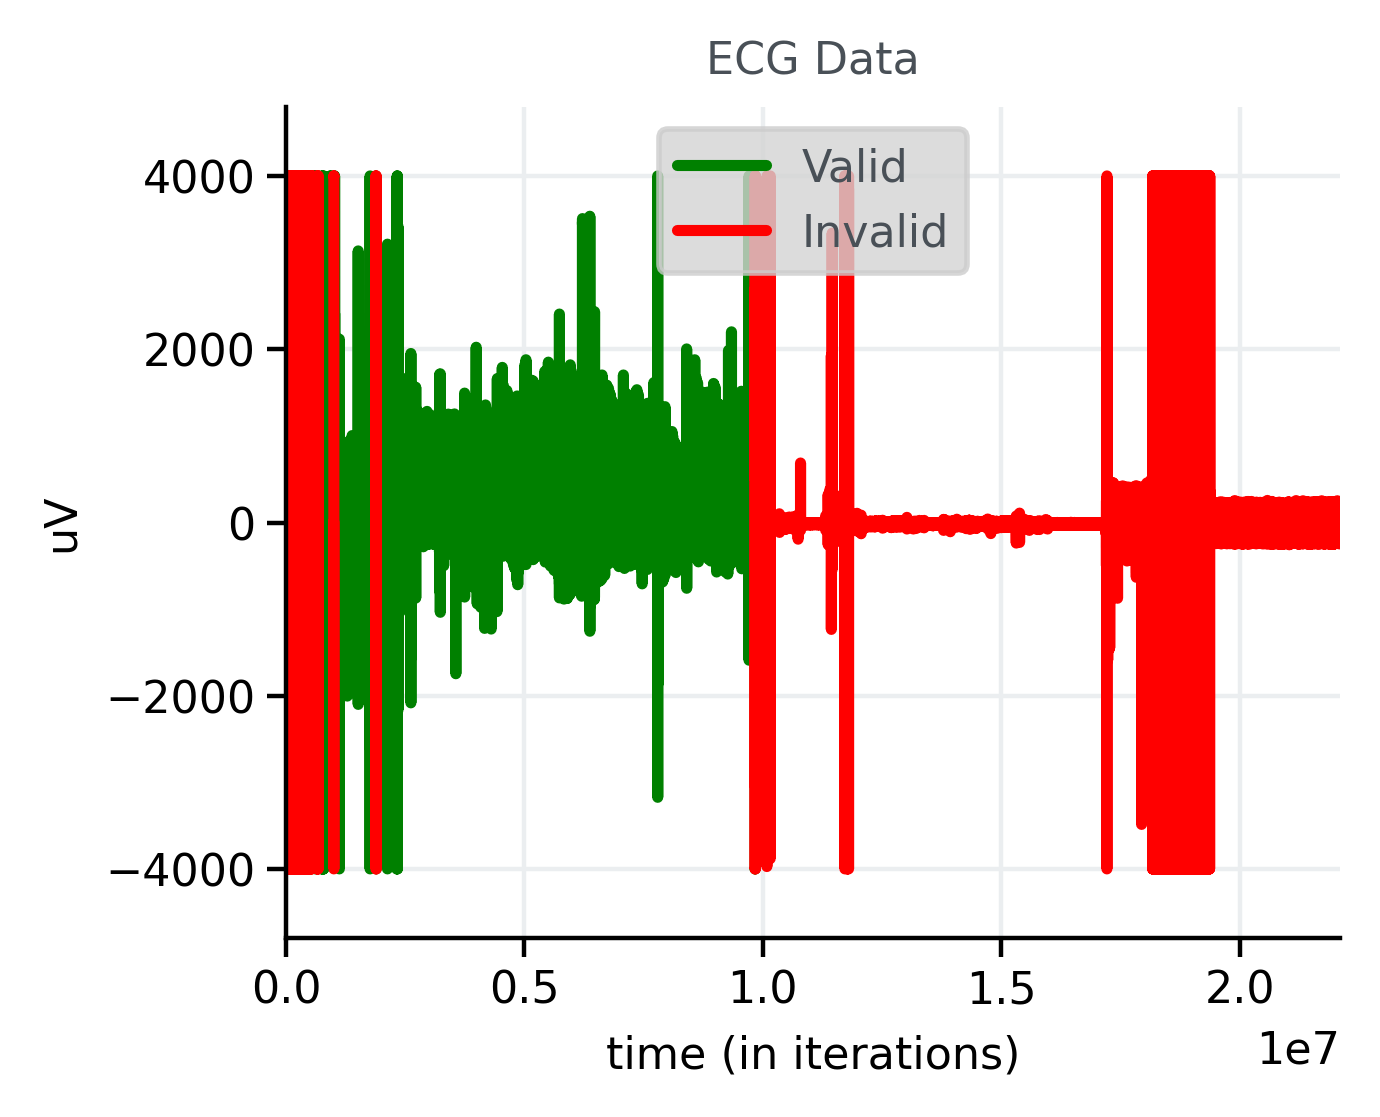

In [19]:
# choose a random file
data_directory = "Data/"
file_data_name = "Somnowatch_Messung.edf"

preparation_results_path = PREPARATION_DIRECTORY + data_directory + PREPARATION_RESULTS_NAME
file_data_path = data_directory + file_data_name

# load the valid regions
preparation_results_generator = main.load_from_pickle(preparation_results_path)
for generator_entry in preparation_results_generator:
    if generator_entry[parameters["file_name_dictionary_key"]] == file_data_name:
        this_files_valid_ecg_regions = generator_entry[parameters["valid_ecg_regions_dictionary_key"]]
        break

# load the ECG data
ECG, frequency = main.read_edf.get_data_from_edf_channel(
    file_path = file_data_path,
    possible_channel_labels = parameters["ecg_keys"],
    physical_dimension_correction_dictionary = parameters["physical_dimension_correction_dictionary"]
    )

# calculate the ratio of valid regions to total regions
valid_regions_ratio = main.check_data.valid_total_ratio(
    ECG = ECG, 
    valid_regions = this_files_valid_ecg_regions
    )
print("(Valid / Total) Regions Ratio: %f %%" % (round(valid_regions_ratio, 4)*100))

total_length = len(ECG)
x_lim = [int(0*total_length), int(1*total_length)]

main.plot_helper.plot_valid_regions(
    ECG = ECG, 
    valid_regions = this_files_valid_ecg_regions,
    xlim = x_lim
    )

## Calculating R peaks

The calculated R peaks will be plotted in a random interval. Of course you can change the
interval size or even define the interval yourself. Go ahead and look at a few different intervals
for different files!

ATTENTION: Valid ECG Regions and R peaks must have been compiled first (see main.py - PREPARATION SECTION)

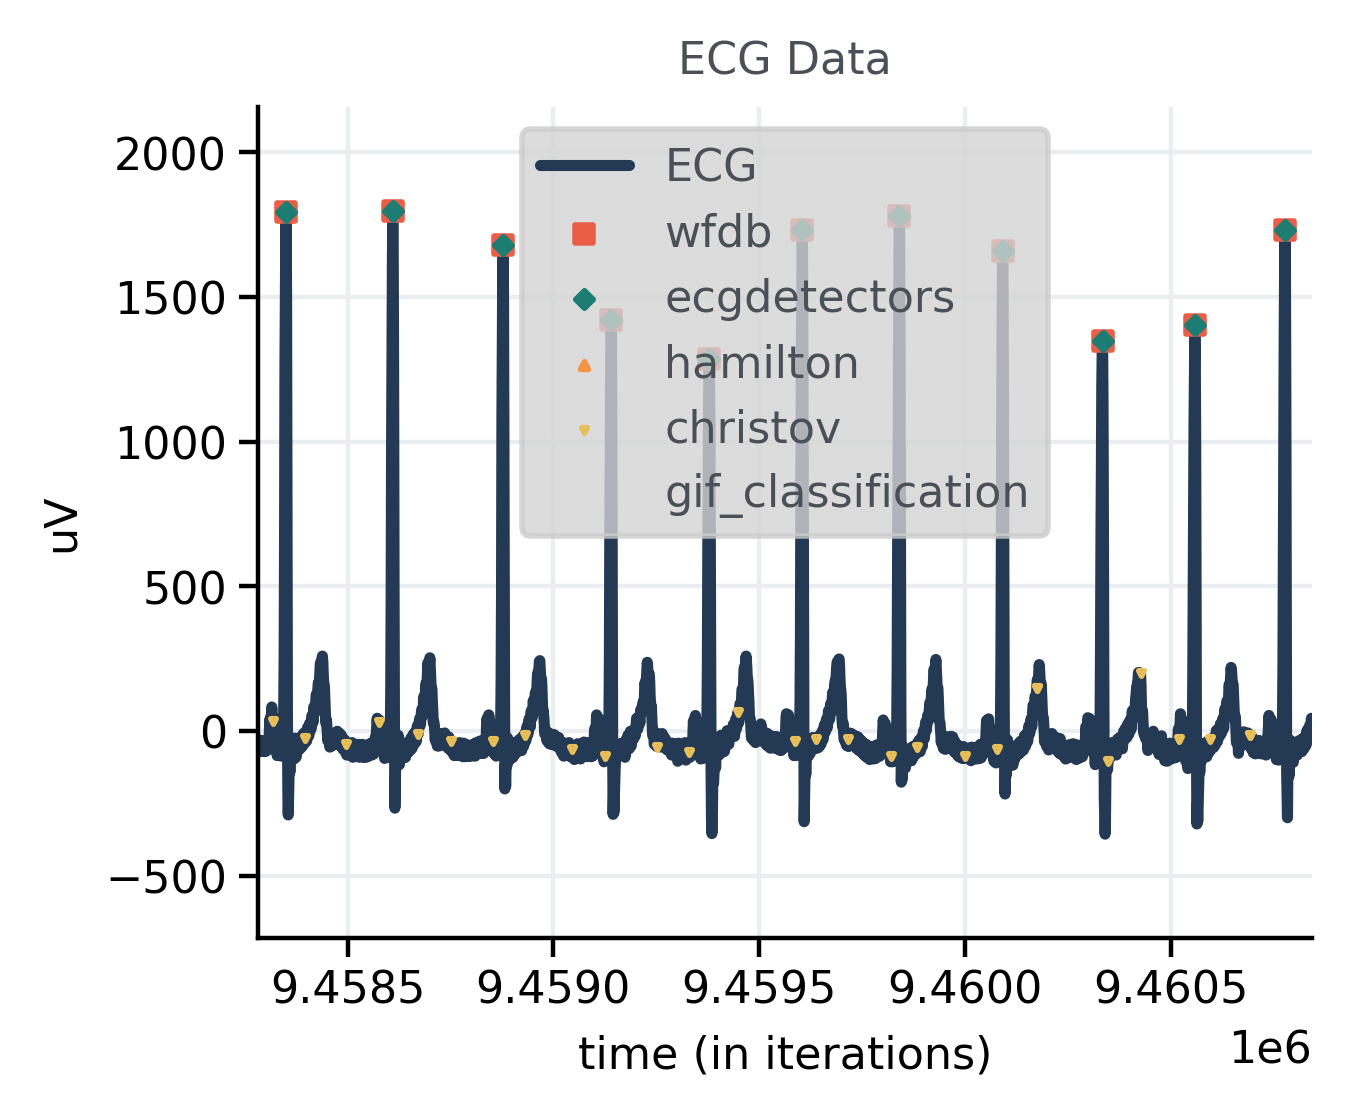

In [29]:
# choose a random file
data_directory = "Data/GIF/SOMNOwatch/"
file_data_name = "SL001_SL001_(1).edf"

file_data_path = data_directory + file_data_name
additions_results_path = parameters["additions_results_path"]

# choose size of interval
interval_size = 2560

# get r-peak function names
rpeak_function_names = parameters["rpeak_comparison_function_names"]
rpeaks = []

# load the valid regions
additions_results_generator = main.load_from_pickle(additions_results_path)
for generator_entry in additions_results_generator:
    if generator_entry[parameters["file_name_dictionary_key"]] == file_data_name:
        this_files_valid_ecg_regions = generator_entry[parameters["valid_ecg_regions_dictionary_key"]]
        for rpeak_function_name in rpeak_function_names:
            rpeaks.append(generator_entry[rpeak_function_name])
        break

# load the ECG data
ECG, frequency = main.read_edf.get_data_from_edf_channel(
    file_path = file_data_path,
    possible_channel_labels = parameters["ecg_keys"],
    physical_dimension_correction_dictionary = parameters["physical_dimension_correction_dictionary"]
    )

# choose random valid interval
random_valid_ecg_region = random.choice(this_files_valid_ecg_regions)
random_valid_ecg_region_start = random.randint(random_valid_ecg_region[0], random_valid_ecg_region[1] - interval_size)

# x_lim = [708000, 708500]
# x_lim = [1358000, 1359000]
# x_lim = [759000, 759150]
x_lim = [random_valid_ecg_region_start, random_valid_ecg_region_start + interval_size]

main.plot_helper.plot_rpeak_detection(
    ECG = ECG,
    rpeaks = rpeaks,
    rpeaks_name = rpeak_function_names,
    xlim = x_lim)

## Calculating MAD Values

The calculated MAD Values will be plotted in a random interval. Of course you can change the
interval size or even define the interval yourself. Go ahead and look at a few different intervals
for different files!

ATTENTION: MAD Values must have been compiled first (see main.py - PREPARATION SECTION)

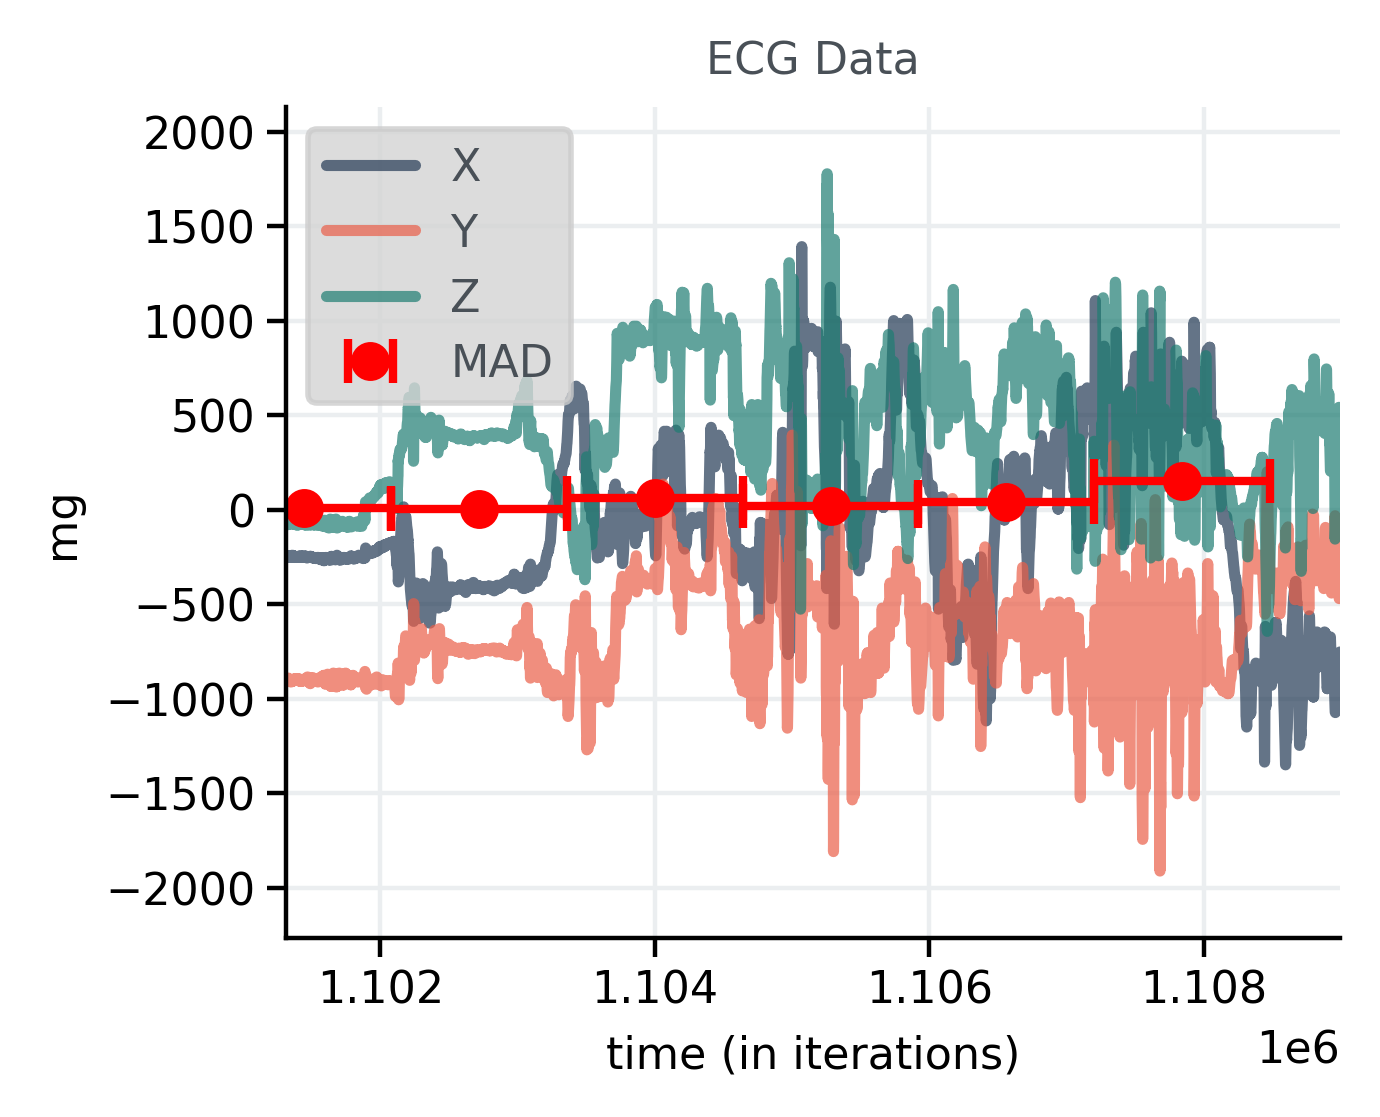

In [22]:
# choose a random file
data_directory = "Data/"
file_data_name = "Somnowatch_Messung.edf"

preparation_results_path = PREPARATION_DIRECTORY + data_directory + PREPARATION_RESULTS_NAME
file_data_path = data_directory + file_data_name

# choose size of interval
interval_size = 7680 # 60 seconds for 128 Hz

# load the MAD values
preparation_results_generator = main.load_from_pickle(preparation_results_path)
for generator_entry in preparation_results_generator:
    if generator_entry[parameters["file_name_dictionary_key"]] == file_data_name:
        this_files_MAD_values = generator_entry[parameters["MAD_dictionary_key"]]
        break

# create lists to save the acceleration data and frequencies for each axis
acceleration_data = []
acceleration_data_frequencies = []

# get the acceleration data and frequency for each axis
for possible_axis_keys in parameters["wrist_acceleration_keys"]:
    this_axis_signal, this_axis_frequency = main.read_edf.get_data_from_edf_channel(
        file_path = file_data_path,
        possible_channel_labels = possible_axis_keys,
        physical_dimension_correction_dictionary = parameters["physical_dimension_correction_dictionary"]
    )

    # append data to corresponding lists
    acceleration_data.append(this_axis_signal)
    acceleration_data_frequencies.append(this_axis_frequency)

# load data and choose random valid interval
total_length = len(acceleration_data[0])
frequency = acceleration_data_frequencies[0]

# choose random region to plot
random_valid_region_start = random.randint(0, total_length - interval_size)
random_valid_region_start = 1101312
x_lim = [random_valid_region_start, random_valid_region_start + interval_size]

main.plot_helper.plot_MAD_values(
    acceleration_data = acceleration_data,
    frequency = frequency,
    MAD_values = this_files_MAD_values,
    mad_time_period_seconds = parameters["mad_time_period_seconds"], 
    xlim = x_lim
    )